In [ ]:
import os

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode

In [2]:
PATH = os.path.join("..", "content", "mnist-original.mat")

In [3]:
CLUSTERS = 1000
EPOCHS = 10
IMG_SIZE = 28
LIMITING_PER = 0.95
SAMPLES = 60000

In [4]:
mnist = loadmat(PATH)
mnist_data, mnist_label = np.array(mnist["data"].T), np.array(mnist["label"][0].T)
train_mnist_data, test_mnist_data = mnist_data[:SAMPLES], mnist_data[SAMPLES:]
train_mnist_label, test_mnist_label = mnist_label[:SAMPLES], mnist_label[SAMPLES:]

In [5]:
pca = PCA(n_components=LIMITING_PER, svd_solver="full")

X_PCA_train = pca.fit_transform(train_mnist_data)
X_PCA_test = pca.transform(test_mnist_data) 

Clusters: 1, Accuracy: 11.35%
Clusters: 2, Accuracy: 20.78%
Clusters: 3, Accuracy: 29.52%
Clusters: 4, Accuracy: 36.75%
Clusters: 5, Accuracy: 45.40%
Clusters: 6, Accuracy: 50.27%
Clusters: 7, Accuracy: 54.22%
Clusters: 8, Accuracy: 52.55%
Clusters: 9, Accuracy: 53.01%
Clusters: 10, Accuracy: 57.20%
Clusters: 11, Accuracy: 58.07%
Clusters: 12, Accuracy: 61.29%
Clusters: 13, Accuracy: 63.07%
Clusters: 14, Accuracy: 66.97%
Clusters: 15, Accuracy: 67.91%
Clusters: 16, Accuracy: 69.42%
Clusters: 17, Accuracy: 68.92%
Clusters: 18, Accuracy: 70.17%
Clusters: 19, Accuracy: 71.27%
Clusters: 20, Accuracy: 70.48%
Clusters: 21, Accuracy: 71.28%
Clusters: 22, Accuracy: 72.62%
Clusters: 23, Accuracy: 73.90%
Clusters: 24, Accuracy: 74.02%
Clusters: 25, Accuracy: 75.63%
Clusters: 26, Accuracy: 75.53%
Clusters: 27, Accuracy: 75.62%
Clusters: 28, Accuracy: 75.58%
Clusters: 29, Accuracy: 75.87%
Clusters: 30, Accuracy: 75.74%
Clusters: 31, Accuracy: 76.18%
Clusters: 32, Accuracy: 76.10%
Clusters: 33, Acc

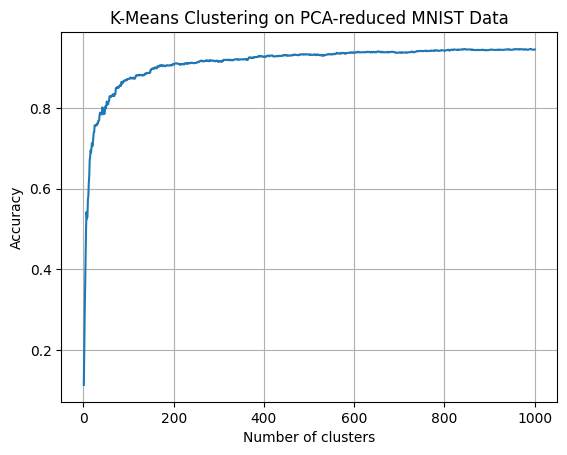

In [6]:
epochs = np.arange(1, CLUSTERS + 1, 1)
accuracy = []

for cluster in range(1, CLUSTERS + 1, 1):
    k_means = KMeans(n_clusters=cluster, n_init="auto", max_iter=EPOCHS, random_state=42)
    k_means.fit(X_PCA_train)
    pred_train_mnist_label = k_means.predict(X_PCA_train)

    cluster_labels = np.zeros(cluster, dtype=int)
    for i in range(cluster):
        mask = pred_train_mnist_label == i
        cluster_labels[i] = mode(train_mnist_label[mask], keepdims=True).mode[0]

    pred_test_mnist_label = k_means.predict(X_PCA_test)
    pred_test_mnist_label = cluster_labels[pred_test_mnist_label]

    epoch_accuracy = np.sum(pred_test_mnist_label == test_mnist_label) / len(test_mnist_label)
    accuracy.append(epoch_accuracy)

    print(f"Clusters: {cluster}, Accuracy: {epoch_accuracy * 100:.2f}%")

plt.plot(epochs[:], accuracy)
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")
plt.title("K-Means Clustering on PCA-reduced MNIST Data")
plt.grid()
plt.show()

In [7]:
OPT_CLUSTERS = 856

In [8]:
k_means = KMeans(n_clusters=OPT_CLUSTERS, n_init="auto", max_iter=EPOCHS, random_state=42)
k_means.fit(X_PCA_train)
pred_train_mnist_label = k_means.predict(X_PCA_train)

cluster_labels = np.zeros(OPT_CLUSTERS, dtype=int)
for i in range(OPT_CLUSTERS):
    mask = pred_train_mnist_label == i
    cluster_labels[i] = mode(train_mnist_label[mask], keepdims=True).mode[0]

centroids = pca.inverse_transform(k_means.cluster_centers_)

In [9]:
SHOW = 90

Displaying 90 random centroids out of 856 total centroids.


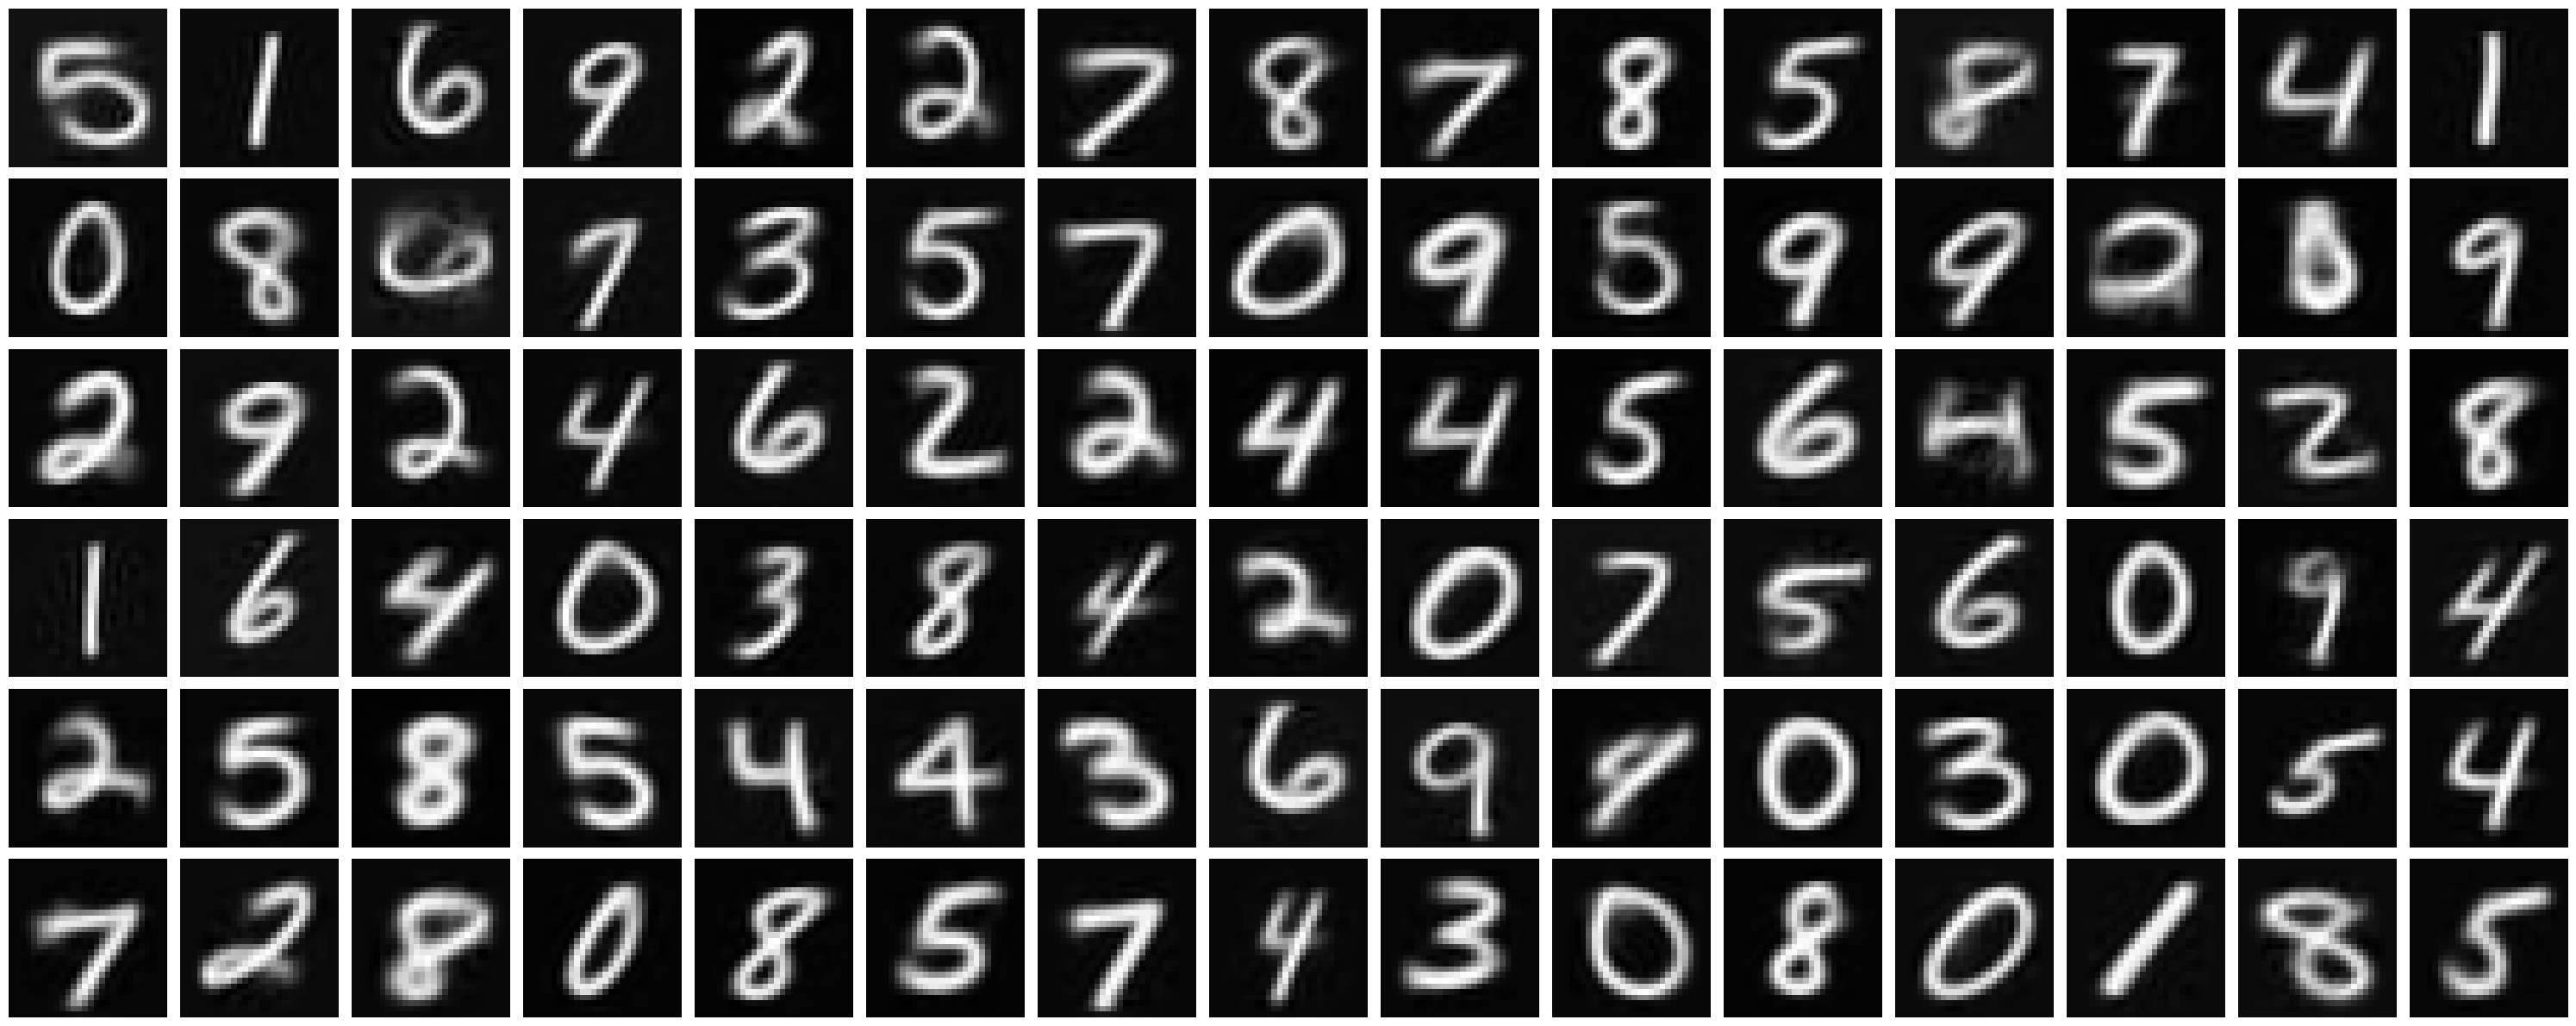

In [10]:
rand_idx = np.random.choice(len(centroids), SHOW, replace=False)

cols = 15
rows = math.ceil(SHOW / cols)

print(f"Displaying {SHOW} random centroids out of {len(centroids)} total centroids.")

fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i < SHOW:
        ax.imshow(centroids[rand_idx[i]].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [11]:
pred_test_mnist_label = k_means.predict(X_PCA_test)
pred_test_mnist_label = cluster_labels[pred_test_mnist_label]

accuracy = np.sum(pred_test_mnist_label == test_mnist_label) / len(test_mnist_label)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.48%
